# Joining with Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### I. Inner Join

#### Dataset

In [2]:
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

#### Join

Merge the `taxi_owners` and `taxi_veh` tables setting a suffix

In [3]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid')
taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


Merge the `taxi_owners` and `taxi_veh` tables setting a (different) suffix

In [4]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid', suffixes = ('_own','_veh'))
taxi_own_veh.head()

,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


Find the most popular `fuel_type`

In [5]:
taxi_own_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

#### Dataset 2

In [6]:
census = pd.read_pickle('census.p')
wards = pd.read_pickle('ward.p')

#### Join

Merge the `wards` and `census` tables on the `ward` column

In [7]:
wards_census = wards.merge(census, on = 'ward')
wards_census.head()

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


#### Dataset 3

In [8]:
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')

#### Join

Merge the `licenses` and `biz_owners` table on `account`

In [9]:
licenses_owners = licenses.merge(biz_owners, on = 'account')

Group the results by `title` then count the number of `accounts`. Sort the `counted_df` in desending order

In [10]:
counted_df = licenses_owners.groupby('title').agg({'account':'count'})
sorted_df = counted_df.sort_values('account', ascending = False)

sorted_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


#### Dataset 4

In [11]:
cal = pd.read_pickle('cta_calendar.p')
ridership = pd.read_pickle('cta_ridership.p')
stations = pd.read_pickle('stations.p')

#### Join

Merge the `ridership` and `cal` tables

In [12]:
ridership_cal = ridership.merge(cal, on = ['year','month','day'])
ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


Merge the `ridership`, `cal`, and `stations` tables

In [13]:
ridership_cal_stations = ridership.merge(cal, on = ['year','month','day']) \
            				.merge(stations, on = ['station_id'])
ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


Create a filter to filter `ridership_cal_stations` then use `.loc` and the filter to select for `rides`

In [14]:
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

ridership_cal_stations.loc[filter_criteria, 'rides'].sum()

140005

#### Dataset 5

In [15]:
zip_demo = pd.read_pickle('zip_demo.p')

#### Join

Merge `licenses` and `zip_demo`, on `zip`; and merge the `wards` on `ward`. Print the results by `alderman` and show median `income`

In [16]:
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
            			.merge(wards, on = 'ward')

licenses_zip_ward.groupby('alderman').agg({'income':'median'}).head()

,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0


#### Dataset 6

In [17]:
land_use = pd.read_pickle('land_use.p')

#### Join

Merge `land_use` and `census` and merge result with `licenses` including suffixes

In [18]:
land_cen_lic = land_use.merge(census, on = 'ward') \
.merge(licenses, on = 'ward', suffixes = ('_cen','_lic'))

Group by `ward`, `pop_2010`, and `vacant`, then count the number of `accounts`

In [19]:
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index = False).agg({'account':'count'})

Sort `pop_vac_lic` and print the results

In [20]:
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending = (False,True,True))

sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


### II. Left Join

#### Dataset

In [21]:
movies_1 = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

#### Join

Merge `movies` and `financials` with a left join

In [22]:
movies_financials = movies_1.merge(financials, on = 'id', how = 'left')

Count the number of rows in the `budget` column that are missing

In [23]:
number_of_missing_fin = movies_financials['budget'].isnull().sum()
print(number_of_missing_fin)

1574


### III. Right Join

#### Dataset

In [24]:
movies = pd.read_pickle('movie_to_genres.p')
action_movies = movies[movies['genre'] == 'Action']
scifi_movies = movies[movies['genre'] == 'Science Fiction']

#### Join

Merge `action_movies` to the `scifi_movies` with right join

In [25]:
action_scifi = action_movies.merge(scifi_movies, on = 'movie_id', how = 'right',
                                   suffixes = ('_act','_sci'))

From `action_scifi`, select only the rows where the `genre_act` column is null

In [26]:
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

Merge the `movies` and `scifi_only` tables with an inner join

In [27]:
movies_and_scifi_only = movies_1.merge(scifi_only, left_on = 'id', right_on = 'movie_id')

print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


Create `pop_movies` with the 10 most popular movies

In [28]:
pop_movies = movies_1.sort_values('popularity', ascending = False).head(10)

Use right join to merge the `movie_to_genres` and `pop_movies` tables. Then, count the number of `genres` and plot a bar chart of the `genre_count`

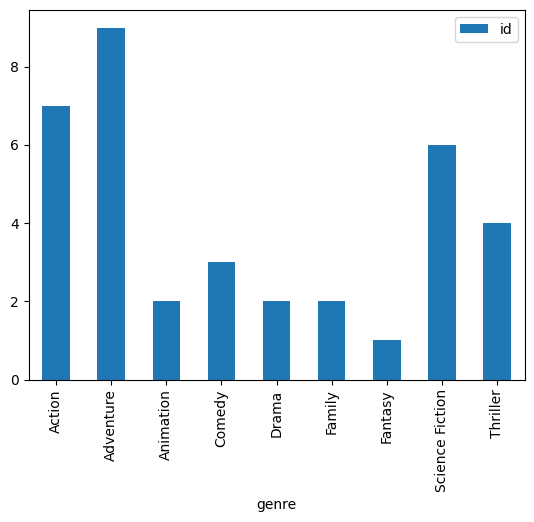

In [29]:
genres_movies = movies.merge(pop_movies, how = 'right', 
                                      left_on = 'movie_id', 
                                      right_on = 'id')

genre_count = genres_movies.groupby('genre').agg({'id':'count'})
genre_count.plot(kind = 'bar')
plt.show()

### IV. Index Join

#### Dataset

In [30]:
rating = pd.read_pickle('ratings.p')

#### Set index

In [31]:
movies_1 = movies_1.set_index('id')
rating = rating.set_index('id')

#### Join

Merge to the `movies` table the `ratings` table on the index

In [32]:
movies_ratings = movies_1.merge(rating, on = 'id')
movies_ratings.head()

,title,popularity,release_date,vote_average,vote_count
id,,,,,
257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
9672,Infamous,3.680896,2006-11-16,6.4,60.0
12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


#### Dataset 2

In [33]:
sequels = pd.read_pickle('sequels.p')

#### Set index

In [34]:
financials = financials.set_index('id')
sequels = sequels.set_index('id')

#### Join

Merge `sequels` and `financials` on index `id`

In [35]:
sequels_fin = sequels.merge(financials, on = 'id', how = 'left')

Self merge with suffixes as inner join with left on `sequel` and right on `id`. Add calculation to subtract `revenue_org` from `revenue_seq` and select the `title_org`, `title_seq`, and `diff` 

In [36]:
orig_seq = sequels_fin.merge(sequels_fin, how = 'inner', left_on = 'sequel', 
                             right_on = 'id', right_index = True,
                             suffixes = ('_org','_seq'))

orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
titles_diff = orig_seq[['title_org','title_seq','diff']]

titles_diff.sort_values('diff', ascending=False).head()

,title_org,title_seq,diff
id,,,
331,Jurassic Park III,Jurassic World,1.144748e+09
272,Batman Begins,The Dark Knight,6.303398e+08
10138,Iron Man 2,Iron Man 3,5.915067e+08
863,Toy Story 2,Toy Story 3,5.696028e+08
10764,Quantum of Solace,Skyfall,5.224703e+08
